<a href="https://colab.research.google.com/github/roshan-pasha/Machine-Learning/blob/master/TensorFlow_Classification_EarlyStopping_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
from tensorflow.keras.models import Sequential

In [0]:
#upload
from google.colab import files
upload_train = files.upload()

Saving cancer_classification.csv to cancer_classification.csv


In [0]:
#Read File
import io
df = pd.read_csv(io.BytesIO(upload_train['cancer_classification.csv']))

In [29]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [0]:
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [0]:
df.shape

(569, 31)

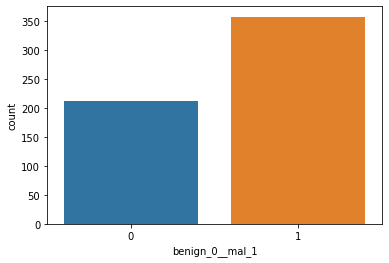

In [0]:
#Checking Target variable benign_0__mal_1
sns.countplot(x = 'benign_0__mal_1',data = df)

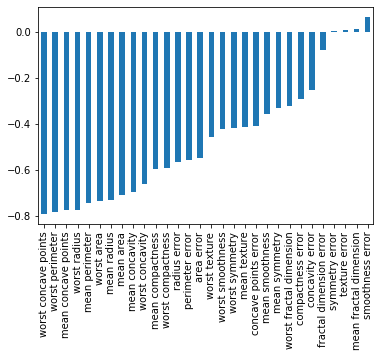

In [0]:
#checking the correlation w.r.t Target variable
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')
# here we first checked corr against Target Variable, next removed the target vsriable [:-1]
# next sorted the values and plot the bar plot
# we can clearly see that the independednt variables are negitively correlated with Target variable

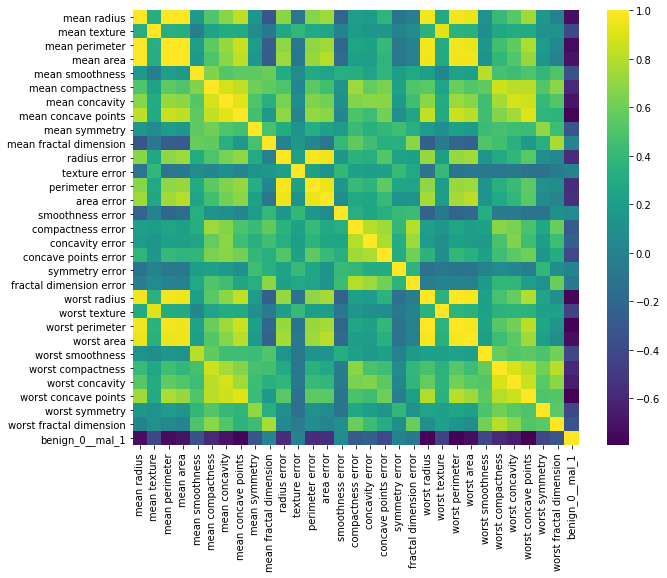

In [0]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap='viridis')

In [0]:
# Splitting X and Y note that .values as Tensorflow dosent undersand pandas DF
X = df.drop('benign_0__mal_1',axis = 1).values
y = df['benign_0__mal_1'].values

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 101 )

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scalar = MinMaxScaler()

In [0]:
X_train = scalar.fit_transform(X_train)

In [0]:
X_test = scalar.transform(X_test)

In [0]:
from tensorflow.keras.models import Sequential

In [0]:
from tensorflow.keras.layers import Dense , Dropout

In [0]:
X_train.shape

(426, 30)

In [0]:
model = Sequential()

model.add(Dense(30,activation= 'relu'))
model.add(Dense(15,activation= 'relu'))

# For binary classifications we need to uses Sigmoid
model.add(Dense(1,activation= 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [0]:
model.fit(x = X_train,y = y_train, epochs= 600, validation_data= (X_test,y_test) )

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6885 - val_loss: 0.6690
Epoch 2/600
426/426 [==============================] - 0s 75us/sample - loss: 0.6539 - val_loss: 0.6350
Epoch 3/600
426/426 [==============================] - 0s 77us/sample - loss: 0.6161 - val_loss: 0.5989
Epoch 4/600
426/426 [==============================] - 0s 75us/sample - loss: 0.5782 - val_loss: 0.5590
Epoch 5/600
426/426 [==============================] - 0s 84us/sample - loss: 0.5416 - val_loss: 0.5155
Epoch 6/600
426/426 [==============================] - 0s 95us/sample - loss: 0.4924 - val_loss: 0.4612
Epoch 7/600
426/426 [==============================] - 0s 77us/sample - loss: 0.4375 - val_loss: 0.4060
Epoch 8/600
426/426 [==============================]

In [0]:
loss_df = pd.DataFrame(model.history.history)

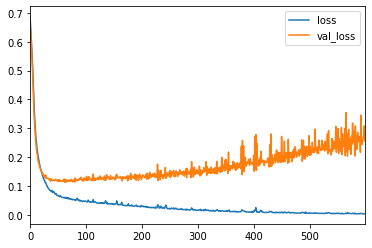

In [0]:
#plotting the loss df
loss_df.plot()



> So we can clearly see that our model is ovefitting and as at one point the Training loss is decreasing and our valitation loss has started increasing



In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
?EarlyStopping

In [0]:
# So know we are going to train the model again to detect stopping point

model = Sequential()

model.add(Dense(30,activation= 'relu'))
model.add(Dense(15,activation= 'relu'))

# For binary classifications we need to uses Sigmoid
model.add(Dense(1,activation= 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [0]:
early_stop = EarlyStopping(monitor= 'val_loss', mode = 'min',verbose=1,patience=25)
# Mode = auto , min , max -- it depends on what parameter you want to monitor (if accuracy than max , if loss than min)
# Verbose = 1 means we nare not going to see the background of layers running
# pataince = 25 means, we wait till 25 more ephocs after finding stopping point

In [34]:
model.fit(x = X_train,y = y_train, epochs= 600, validation_data= (X_test,y_test) , callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 527us/sample - loss: 0.6484 - val_loss: 0.6138
Epoch 2/600
426/426 [==============================] - 0s 95us/sample - loss: 0.5927 - val_loss: 0.5672
Epoch 3/600
426/426 [==============================] - 0s 85us/sample - loss: 0.5476 - val_loss: 0.5191
Epoch 4/600
426/426 [==============================] - 0s 94us/sample - loss: 0.4979 - val_loss: 0.4668
Epoch 5/600
426/426 [==============================] - 0s 76us/sample - loss: 0.4481 - val_loss: 0.4143
Epoch 6/600
426/426 [==============================] - 0s 73us/sample - loss: 0.3969 - val_loss: 0.3639
Epoch 7/600
426/426 [==============================] - 0s 79us/sample - loss: 0.3480 - val_loss: 0.3208
Epoch 8/600
426/426 [==============================] - 0s 90us/sample - loss: 0.3056 - val_loss: 0.2803
Epoch 9/600
426/426 [==============================] - 0s 75us/sample - loss: 0.2705 - val_loss: 0.2498
Epoch 10/600
426/

In [0]:
# So know we can see that it stopped at epoch is 70

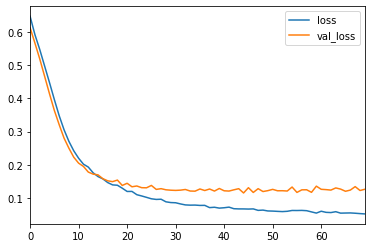

In [36]:
model_loss_earlt_stop = pd.DataFrame(model.history.history)
model_loss_earlt_stop.plot()

In [0]:
# So know we are going to train the model again to detect stopping point along with dropout layer

model = Sequential()

model.add(Dense(30,activation= 'relu'))
model.add(Dropout(0.5)) # here in Dropout we have rate with is from 0 to 1 -- 0 means turnoff 0 layers and 1 means turnoff all layers

model.add(Dense(15,activation= 'relu'))
model.add(Dropout(0.5))

# For binary classifications we need to uses Sigmoid
model.add(Dense(1,activation= 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [38]:
model.fit(x = X_train,y = y_train, epochs= 600, validation_data= (X_test,y_test) , callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 771us/sample - loss: 0.7026 - val_loss: 0.6828
Epoch 2/600
426/426 [==============================] - 0s 79us/sample - loss: 0.6767 - val_loss: 0.6680
Epoch 3/600
426/426 [==============================] - 0s 99us/sample - loss: 0.6630 - val_loss: 0.6529
Epoch 4/600
426/426 [==============================] - 0s 89us/sample - loss: 0.6391 - val_loss: 0.6356
Epoch 5/600
426/426 [==============================] - 0s 78us/sample - loss: 0.6366 - val_loss: 0.6144
Epoch 6/600
426/426 [==============================] - 0s 94us/sample - loss: 0.6183 - val_loss: 0.5934
Epoch 7/600
426/426 [==============================] - 0s 97us/sample - loss: 0.6154 - val_loss: 0.5718
Epoch 8/600
426/426 [==============================] - 0s 88us/sample - loss: 0.5847 - val_loss: 0.5420
Epoch 9/600
426/426 [==============================] - 0s 85us/sample - loss: 0.5495 - val_loss: 0.5045
Epoch 10/600
426/

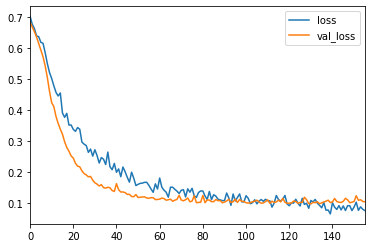

In [39]:
model_loss_early_stop_dropout = pd.DataFrame(model.history.history)
model_loss_early_stop_dropout.plot()

In [0]:
#Know Checkias its binary and we need to predict classes 
predictions = model.predict_classes(X_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [44]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]
